参考にしたサイト
https://ohke.hateblo.jp/entry/2017/08/04/230000

使うデータセット
https://www.kaggle.com/joniarroba/noshowappointments

今回学んだこと
①ダミー変数　②drop_list

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import seaborn

# CSVファイルからDataFrameへロード
df0= pd.read_csv('KaggleV2-May-2016.csv')
df0.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#患者の情報
#患者ID(patientID)、予約番号（AppintmentID)、
#年齢(Age)、性別(Gender) 、ハンディキャップ有無(Handcap)、奨学金有無(Scholarship)、病院から近所か（Neighbourhood)
#アルコール依存(Alcoolism)、高血圧(HyperTension)、糖尿病(Diabetes)

#予約の情報
#予約を行った日(AppointmentDay)、予約日(ScheduledDay)、SMSリマインド(SMS_received)、

#結果
#来た？(No-show)

In [7]:
df0['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [8]:
df1=pd.get_dummies(df0, drop_first=True, columns=['Gender', 'No-show'])
drop_list1 = ['PatientId','AppointmentID']
df1= df1.drop(drop_list1,axis = 1 ) 
df1.head() 
#Gender...F=0, M=1
#No-show...No=0, show=1

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_M,No-show_Yes
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AEDEEDEDD8>,
      dtype=object)

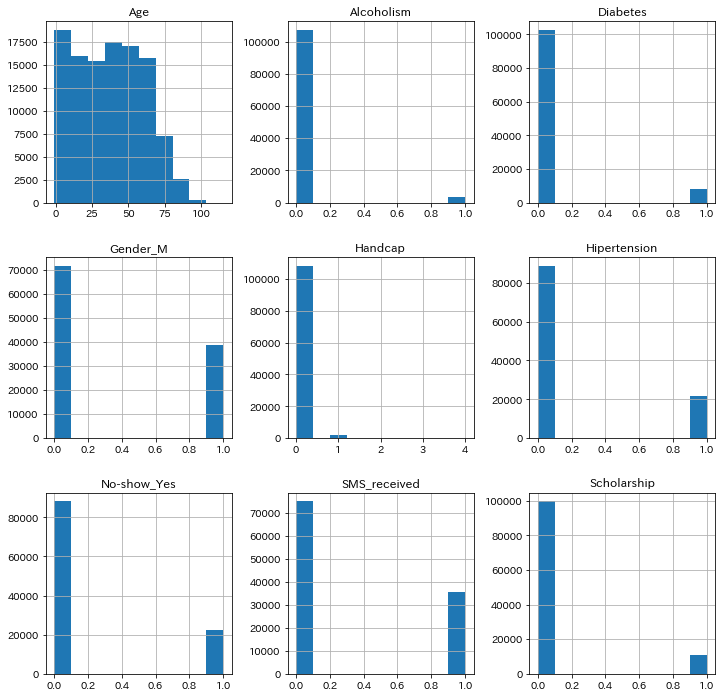

In [16]:
df1.hist(figsize=(12, 12))